#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset into notebook

In [2]:
og_file = pd.read_csv('credit_risk.csv')

In [3]:
og_file

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [4]:
#duplicating the data to work on
dup_file = og_file.copy()
dup_file

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


#### EDA & Data Cleaning & Preparation

In [5]:
dup_file.shape

#data set has 12 columns and 32,581 rows

(32581, 12)

In [6]:
dup_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [7]:
#I don't need id so dropping it

dup_file = dup_file.drop('Id',axis=1)

In [8]:
dup_file = dup_file.drop('Percent_income',axis=1)

In [9]:
dup_file.shape

(32581, 10)

In [10]:
#checking for the unique values  of the status column
dup_file['Status'].unique()

array([1, 0], dtype=int64)

In [11]:
#i am also opting to loan status

dup_file = dup_file.drop('Status',axis=1)

In [12]:
dup_file.shape

(32581, 9)

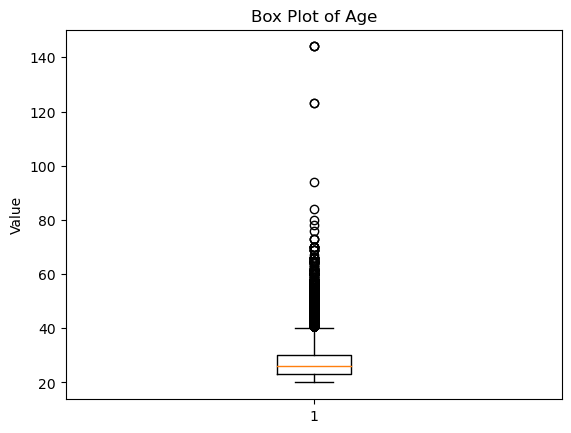

In [13]:
#checking for outliers in age

# Plot box plot to visualize outliers
plt.boxplot(dup_file['Age'])

plt.title('Box Plot of Age')
plt.ylabel('Value')

plt.show()

In [14]:
#investigating the age outliers 123
dup_file[dup_file['Age'] > 80]

#the entries are feww with improbable employee length so i'm dropping them

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length
81,144,250000,RENT,4.0,VENTURE,4800,13.57,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,NaN,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,N,25
32416,94,24000,RENT,1.0,MEDICAL,6500,NaN,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,10000,7.51,N,24


In [15]:
#dropping Age outliers

# I want to drop rows where age greater than 80
value_to_drop_1 = 80

# Drop rows where 'column_name' is equal to the specific value
dup_file = dup_file[dup_file['Age'] < value_to_drop_1]


In [16]:
#looking at the statistics of the age column to confirm change

dup_file['Age'].describe()

count    32573.000000
mean        27.712676
std          6.179754
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         78.000000
Name: Age, dtype: float64

In [17]:
#taking a look at the missing values

dup_file.isna().sum()

#Emp_length and Rate have a concerning amount of missing values

Age               0
Income            0
Home              0
Emp_length      895
Intent            0
Amount            0
Rate           3114
Default           0
Cred_length       0
dtype: int64

In [18]:
#looking at the unique values of of the employee_length column

dup_file['Emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [19]:
#investigating the employee length outlier 123
dup_file[dup_file['Emp_length'] == 123]

#people in their twenties can not have such employee length so I am removing that outlier

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,N,4


In [20]:
#dropping employee length value 123

# specify the value I want to drop 
value_to_drop = 123

# dropping unneeded rows 
dup_file = dup_file[dup_file['Emp_length'] != value_to_drop]


In [21]:
#looking at the statistics of the employee_length column

dup_file['Emp_length'].describe()

count    31676.000000
mean         4.782201
std          4.035034
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: Emp_length, dtype: float64

In [22]:
#instances of age being less than or same as emp_length

dup_file[dup_file['Age'] <= dup_file['Emp_length']]

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Default,Cred_length


In [23]:
dup_file['Age'].unique()

array([21, 25, 23, 24, 26, 22, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       40, 50, 45, 37, 39, 44, 43, 41, 46, 38, 47, 42, 48, 49, 58, 65, 51,
       53, 66, 61, 54, 57, 59, 62, 60, 55, 52, 64, 70, 78, 69, 56, 73, 63,
       76, 67], dtype=int64)

C:\Users\COMPUFY\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\COMPUFY\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


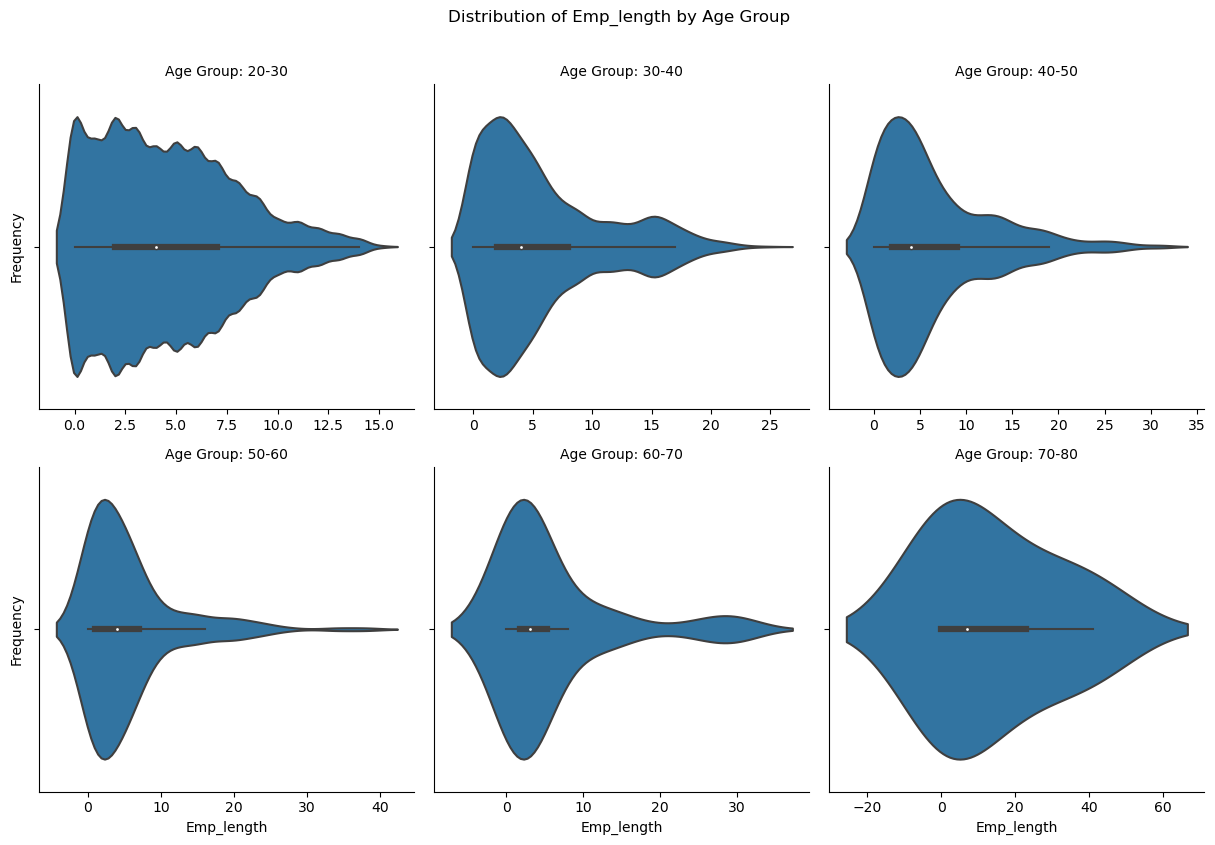

In [24]:
# Define age groups, group ages into bins
age_bins = [20, 30, 40, 50, 60, 70, 80]  # Custom age ranges
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
dup_file['age_group'] = pd.cut(dup_file['Age'], bins=age_bins, labels=age_labels)

# Plotting with FacetGrid
g = sns.FacetGrid(dup_file, col="age_group", col_wrap=3, height=4, sharex=False)
g.map(sns.violinplot, "Emp_length", kde=True)  # You can use sns.boxplot or sns.violinplot instead

# Adding titles and labels
g.set_titles("Age Group: {col_name}")
g.set_axis_labels("Emp_length", "Frequency")
plt.suptitle("Distribution of Emp_length by Age Group", y=1.05)
plt.show()

In [25]:
# Dictionary of skewness by age group (True for right-skewed, False for normal)
skewed_dict = {
    '20-30': False,  # Normal distribution
    '30-40': True,   # Right-skewed
    '40-50': True,   # Right-skewed
    '50-60': True,   # Right-skewed
    '60-70': True,   # Right-skewed
    '70-80': False   # Normal distribution
}

# Fill null values in 'duration' based on skewness by age group
for group, skewed in skewed_dict.items():
    if skewed:
        # Right-skewed: use median
        median_value = dup_file.loc[dup_file['age_group'] == group, 'Emp_length'].median()
        dup_file.loc[(dup_file['age_group'] == group) & (dup_file['Emp_length'].isnull()), 'Emp_length'] = median_value
    else:
        # Normal distribution: use mean
        mean_value = dup_file.loc[dup_file['age_group'] == group, 'Emp_length'].mean()
        dup_file.loc[(dup_file['age_group'] == group) & (dup_file['Emp_length'].isnull()), 'Emp_length'] = mean_value

# Drop the 'age_group' column if it was only needed for filling nulls
dup_file.drop(columns=['age_group'], inplace=True)



In [26]:
dup_file.isna().sum()

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate           3114
Default           0
Cred_length       0
dtype: int64

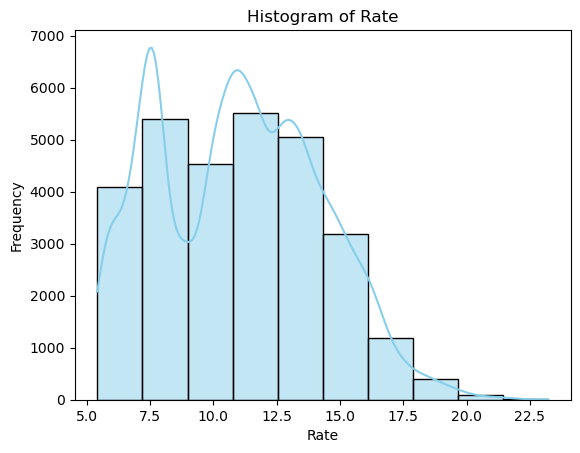

In [27]:
#checking for the distribution of rate

sns.histplot(dup_file['Rate'], bins=10, kde=True, color='skyblue')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Rate')
plt.show()


In [28]:
# filling missing values in rating with mean value 
# calculate the mean of the rating column
median_value = dup_file['Rate'].median()

# Fill null values in the 'value' column with the median
dup_file['Rate'] = dup_file['Rate'].fillna(median_value)

In [29]:
#checking for current null values 
dup_file.isna().sum()

Age            0
Income         0
Home           0
Emp_length     0
Intent         0
Amount         0
Rate           0
Default        0
Cred_length    0
dtype: int64

In [30]:
# moving Default column to the end to make my training easier
dup_file = dup_file[[col for col in dup_file.columns if col != 'Default'] + ['Default']]

In [31]:
dup_file

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Cred_length,Default
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,2,N
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,3,N
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,2,N
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,4,Y
5,21,9900,OWN,2.0,VENTURE,2500,7.14,2,N
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,30,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,19,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,28,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,26,N


In [32]:
dup_file['Default'].unique()

array(['N', 'Y'], dtype=object)

### Visualization & Analysis

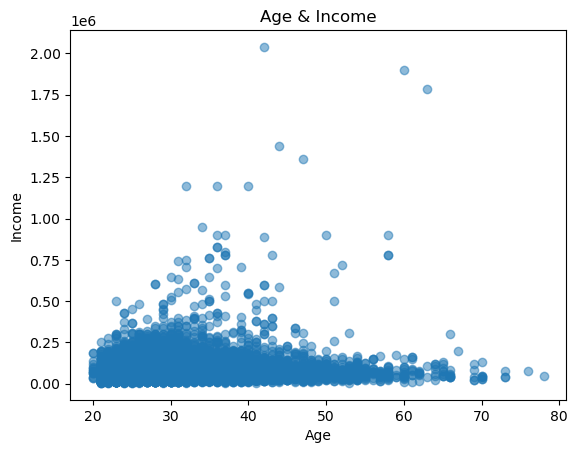

In [33]:
#what is the relationship age and income ?

# Create scatter plot
plt.scatter(dup_file['Age'], dup_file['Income'], alpha=0.5)

# Add titles and labels
plt.title('Age & Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()

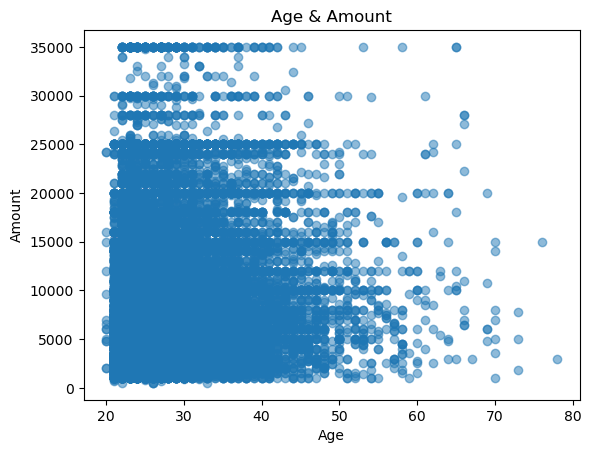

In [34]:
#what is the relationship age and amount ?

# Create scatter plot
plt.scatter(dup_file['Age'], dup_file['Amount'], alpha=0.5)

# Add titles and labels
plt.title('Age & Amount')
plt.xlabel('Age')
plt.ylabel('Amount')

# Show the plot
plt.show()

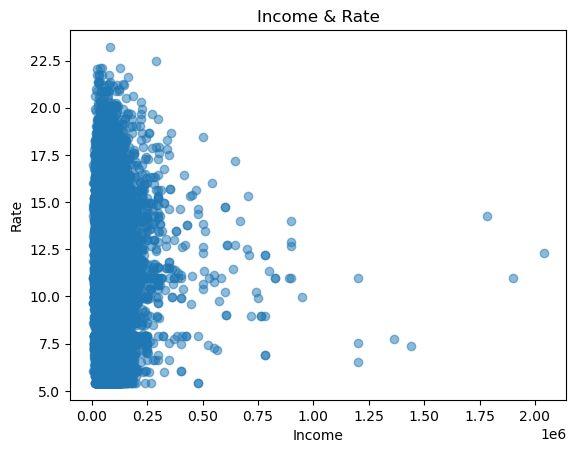

In [35]:
#what is the relationship income and rate ?

# Create scatter plot
plt.scatter(dup_file['Income'], dup_file['Rate'], alpha=0.5)

# Add titles and labels
plt.title('Income & Rate')
plt.xlabel('Income')
plt.ylabel('Rate')

# Show the plot
plt.show()

In [36]:
#Creating Pivot Tables.
# what intent people borrow for
intent_freq=dup_file.groupby(by='Intent')['Intent'].count()
intent_freq=intent_freq.sort_values(ascending=True)
intent_freq

Intent
HOMEIMPROVEMENT      3605
DEBTCONSOLIDATION    5212
PERSONAL             5518
VENTURE              5716
MEDICAL              6069
EDUCATION            6451
Name: Intent, dtype: int64

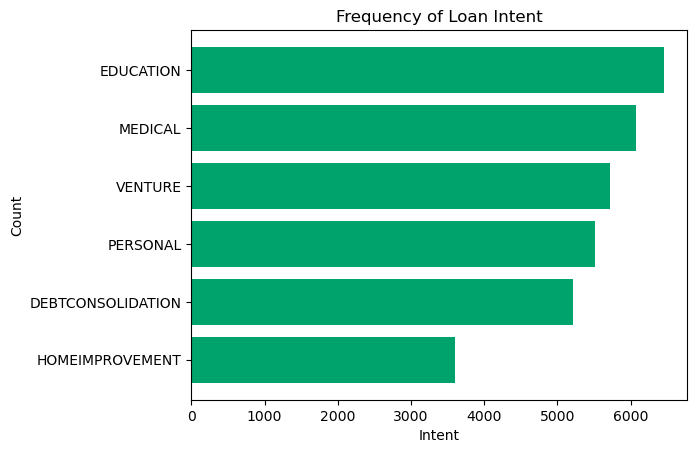

In [37]:
#the chart

plt.barh(intent_freq.index,intent_freq.values, color=['#00A36C'])
plt.xlabel("Intent")
plt.ylabel("Count")
plt.title("Frequency of Loan Intent")
plt.savefig('intentfreq.png')  #saving our figure
plt.show()

In [38]:
# home ownership our borrowers 
home_freq=dup_file.groupby(by='Home')['Home'].count()
home_freq=home_freq.sort_values(ascending=False)
home_freq

Home
RENT        16440
MORTGAGE    13440
OWN          2584
OTHER         107
Name: Home, dtype: int64

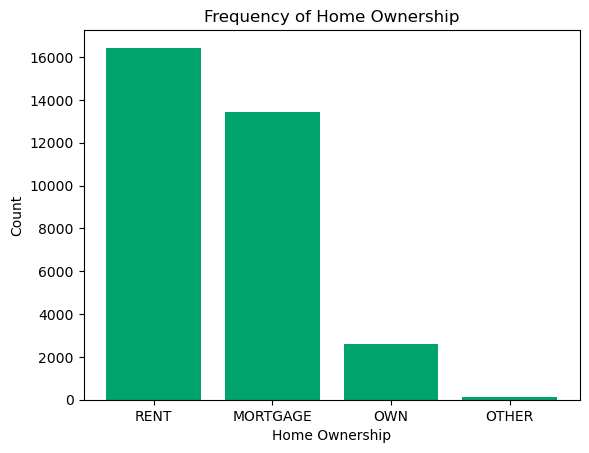

In [39]:
#the chart

plt.bar(home_freq.index,home_freq.values, color=['#00A36C'])
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Frequency of Home Ownership")
plt.savefig('home_freq.png')  #saving our figure
plt.show()

<Figure size 1000x2500 with 0 Axes>

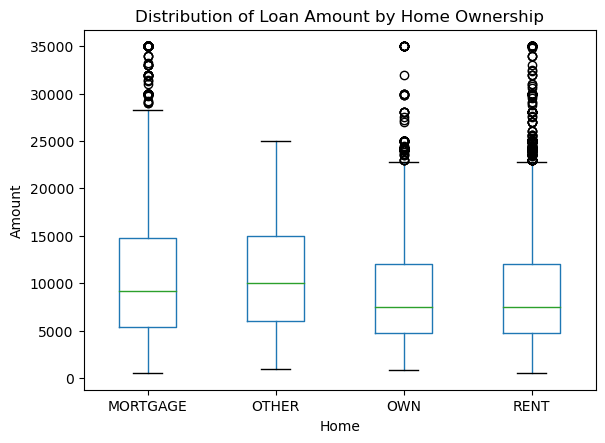

In [40]:
#distribution of loan amount by home ownership
# Create box plot
plt.figure(figsize=(10, 25))
dup_file.boxplot(column='Amount', by='Home', grid=False)

# Add titles and labels
plt.title('Distribution of Loan Amount by Home Ownership')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Home')
plt.ylabel('Amount')

# Show the plot
plt.show()

In [41]:
cleaned_file = dup_file.copy()

In [42]:
cleaned_file.to_csv('cleaned_dataset.csv', index = False)

## Modelling

#### Logistic Regression

In [43]:
log_mod = cleaned_file.copy()

In [44]:
log_mod

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Cred_length,Default
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,2,N
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,3,N
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,2,N
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,4,Y
5,21,9900,OWN,2.0,VENTURE,2500,7.14,2,N
...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,30,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,19,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,28,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,26,N


In [55]:
log_mod['Intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [45]:
#encoding categorical values to become numerals
df_encoded = pd.get_dummies(log_mod, columns=['Home', 'Intent', 'Default'])
print(df_encoded)

       Age  Income  Emp_length  Amount   Rate  Cred_length  Home_MORTGAGE  \
1       21    9600         5.0    1000  11.14            2          False   
2       25    9600         1.0    5500  12.87            3           True   
3       23   65500         4.0   35000  15.23            2          False   
4       24   54400         8.0   35000  14.27            4          False   
5       21    9900         2.0    2500   7.14            2          False   
...    ...     ...         ...     ...    ...          ...            ...   
32576   57   53000         1.0    5800  13.16           30           True   
32577   54  120000         4.0   17625   7.49           19           True   
32578   65   76000         3.0   35000  10.99           28          False   
32579   56  150000         5.0   15000  11.48           26           True   
32580   66   42000         2.0    6475   9.99           30          False   

       Home_OTHER  Home_OWN  Home_RENT  Intent_DEBTCONSOLIDATION  \
1      

In [46]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import FunctionTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [47]:
df_encoded

,Age,Income,Emp_length,Amount,Rate,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
1,21,9600,5.0,1000,11.14,2,False,False,True,False,False,True,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,3,True,False,False,False,False,False,False,True,False,False,True,False
3,23,65500,4.0,35000,15.23,2,False,False,False,True,False,False,False,True,False,False,True,False
4,24,54400,8.0,35000,14.27,4,False,False,False,True,False,False,False,True,False,False,False,True
5,21,9900,2.0,2500,7.14,2,False,False,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,30,True,False,False,False,False,False,False,False,True,False,True,False
32577,54,120000,4.0,17625,7.49,19,True,False,False,False,False,False,False,False,True,False,True,False
32578,65,76000,3.0,35000,10.99,28,False,False,False,True,False,False,True,False,False,False,True,False
32579,56,150000,5.0,15000,11.48,26,True,False,False,False,False,False,False,False,True,False,True,False


In [48]:
#normalising the dataset to ensure features on the dataset have comparable scale

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)


In [49]:
# making my default column which was split into 2 during encoding one again
df_encoded['Default'] = np.argmax(df_encoded[['Default_N', 'Default_Y']].values, axis=1)

# Drop the one-hot encoded columns for the target
df_encoded = df_encoded.drop(['Default_N', 'Default_Y'], axis=1)


In [50]:
#splitting the dataset into dependent and independent variables

X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
#Initializing and fitting the logistic regression model on my training data.
# Instantiate and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [52]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8228702993092862
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      5353
           1       0.51      0.22      0.30      1162

    accuracy                           0.82      6515
   macro avg       0.68      0.59      0.60      6515
weighted avg       0.79      0.82      0.79      6515



In [53]:
#checking the performance of my model
confusion_matrix(y_test,y_pred)

#Model predicted :
#5108 positive that were actually positive
#318 negative that were actually positive
#850 positive that were actually negative
#299 negative that were actually negative

array([[5108,  245],
       [ 909,  253]], dtype=int64)